In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

In [2]:
from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

In [3]:
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

In [4]:
sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [5]:
# IMPORTING DATA

df = pd.read_csv('House_Data.csv')
df.set_index('Id', inplace = True)

df.head(10)

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
1,8450,196.0,150,856,856,854,1710,548,0,61,208500
2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
3,11250,162.0,434,920,920,866,1786,608,0,42,223500
4,9550,0.0,540,756,961,756,1717,642,0,35,140000
5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000
6,14115,0.0,64,796,796,566,1362,480,40,30,143000
7,10084,186.0,317,1686,1694,0,1694,636,255,57,307000
8,10382,240.0,216,1107,1107,983,2090,484,235,204,200000
9,6120,0.0,952,952,1022,752,1774,468,90,0,129900


In [6]:
df.dropna(inplace = True)

print(cl(df.isnull().sum(), attrs = ['bold']))

LotArea        0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
SalePrice      0
dtype: int64


In [7]:
df.describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,10507.276171,103.685262,567.070937,1055.847107,1161.270661,346.944215,1514.091598,472.475207,94.416667,46.390496,180615.063361
std,9989.563592,181.066207,442.082927,438.119089,385.018424,436.370724,525.627765,214.106397,125.393706,66.048619,79285.541485
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,7538.750000,0.000000,222.500000,794.750000,882.000000,0.000000,1128.000000,327.750000,0.000000,0.000000,129900.000000
50%,9478.500000,0.000000,477.500000,990.500000,1086.000000,0.000000,1461.500000,478.000000,0.000000,24.000000,162700.000000
75%,11600.000000,166.000000,808.000000,1297.250000,1391.000000,728.000000,1776.000000,576.000000,168.000000,68.000000,214000.000000
max,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


In [8]:
print(cl(df.dtypes, attrs = ['bold']))

LotArea          int64
MasVnrArea     float64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
GrLivArea        int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
SalePrice        int64
dtype: object


In [9]:
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors = 'coerce')
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')

print(cl(df.dtypes, attrs = ['bold']))

LotArea        int64
MasVnrArea     int64
BsmtUnfSF      int64
TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
GrLivArea      int64
GarageArea     int64
WoodDeckSF     int64
OpenPorchSF    int64
SalePrice      int64
dtype: object


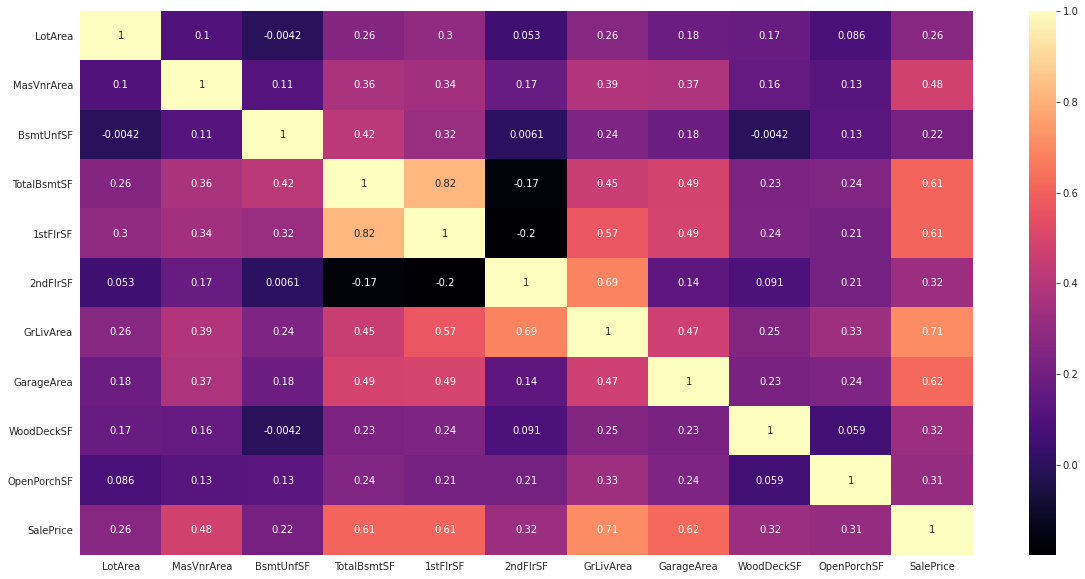

In [10]:
# 1. Heatmap

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [11]:
y_var = 'SalePrice'
scatter_df = df.drop(y_var, axis = 1)
i = df.columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


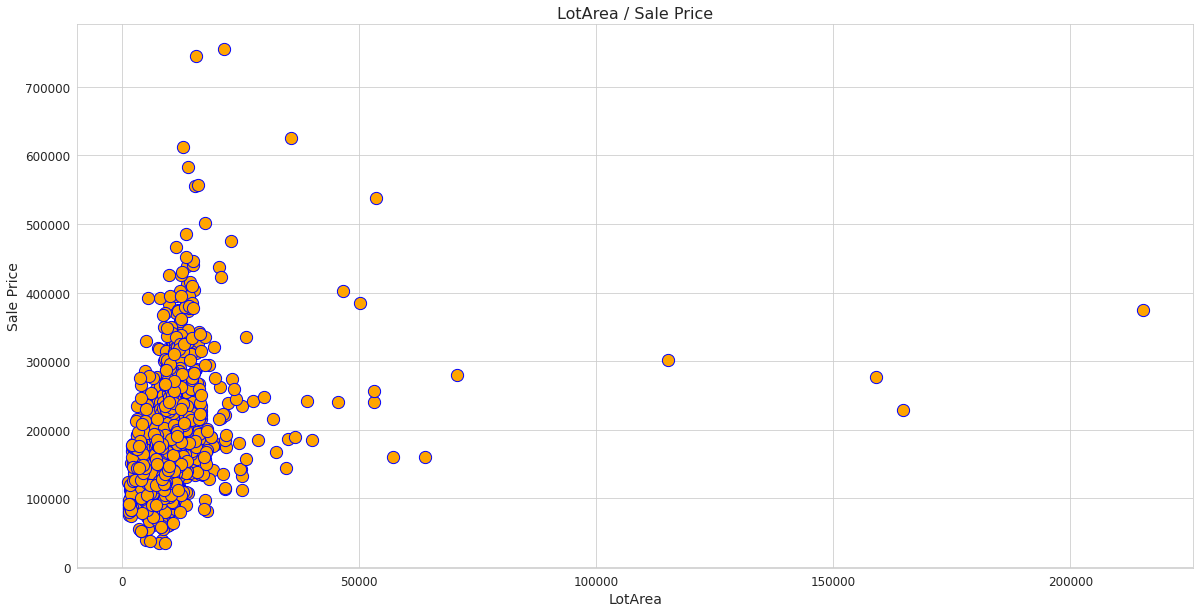

In [12]:
plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
plt.title('{} / Sale Price'.format(i[0]), fontsize = 16)
plt.xlabel('{}'.format(i[0]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter1.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


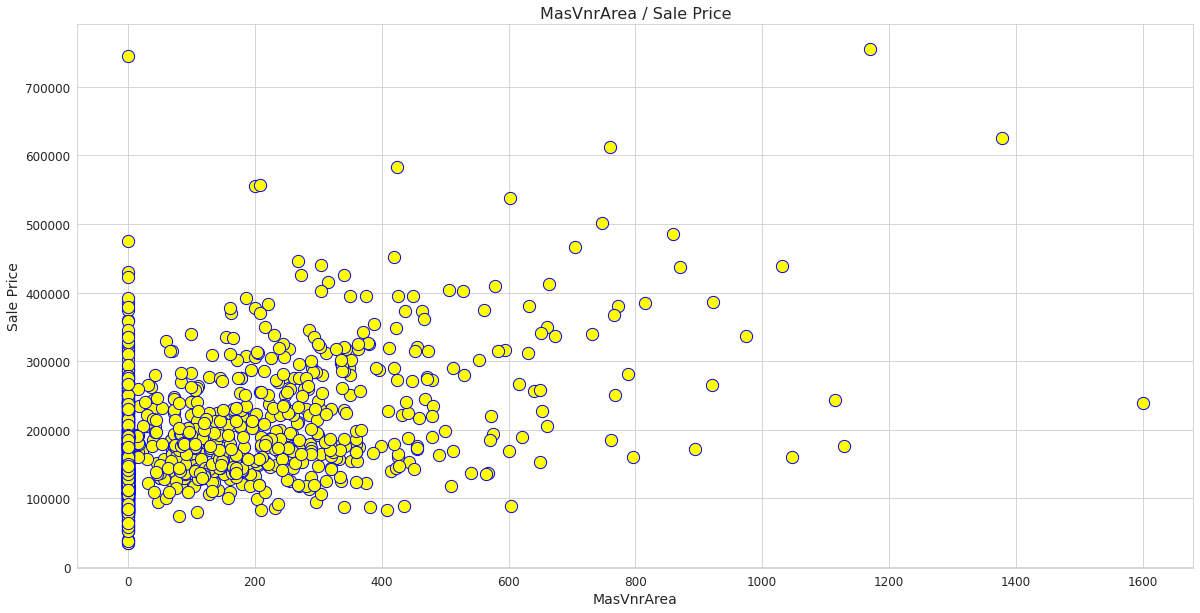

In [13]:
plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
plt.title('{} / Sale Price'.format(i[1]), fontsize = 16)
plt.xlabel('{}'.format(i[1]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter2.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


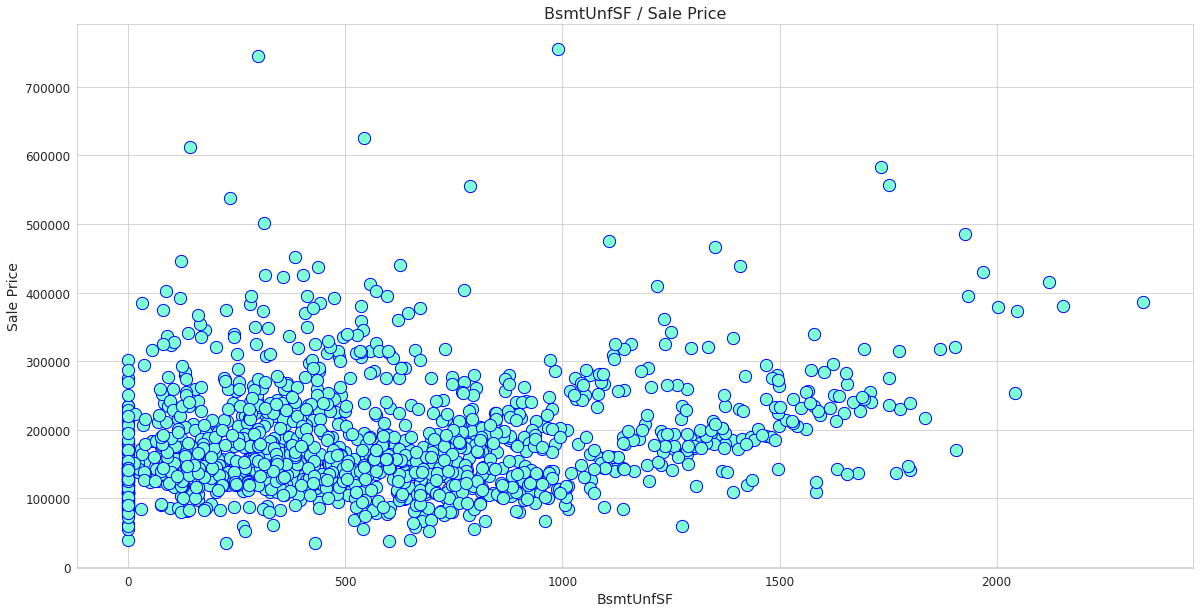

In [14]:
plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
plt.title('{} / Sale Price'.format(i[2]), fontsize = 16)
plt.xlabel('{}'.format(i[2]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter3.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


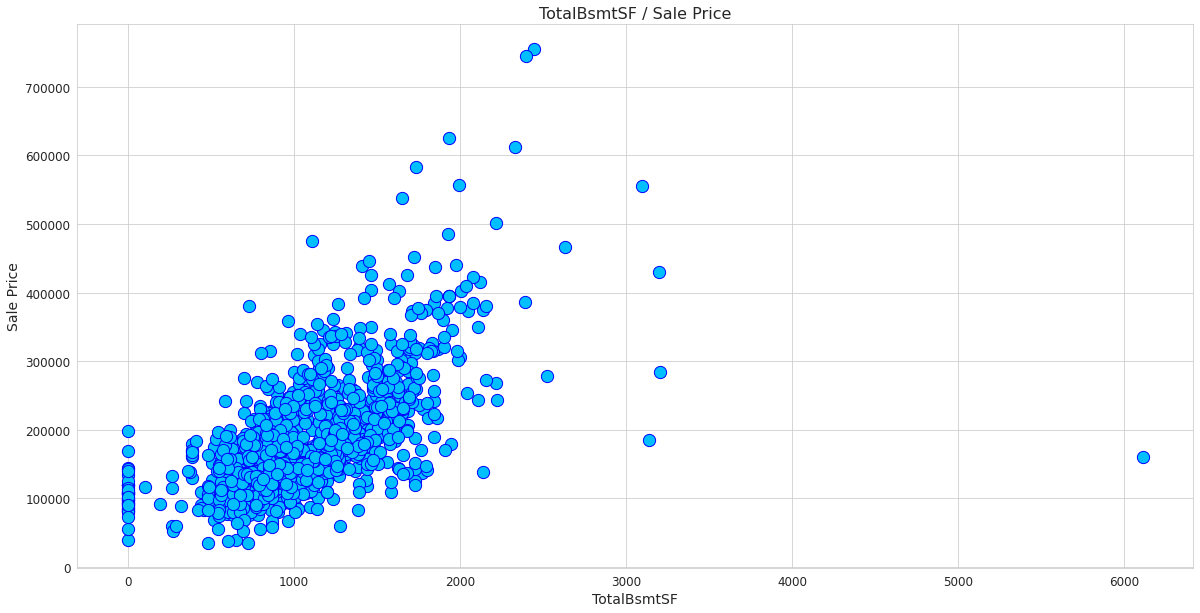

In [15]:

plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
plt.title('{} / Sale Price'.format(i[3]), fontsize = 16)
plt.xlabel('{}'.format(i[3]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter4.png')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


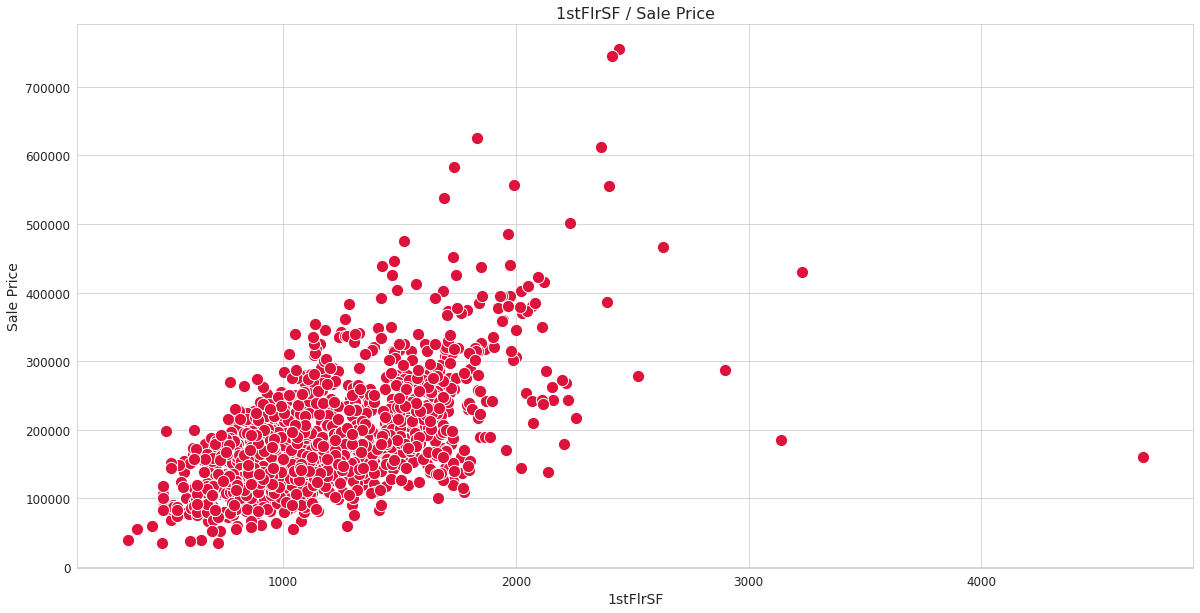

In [16]:
plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
plt.title('{} / Sale Price'.format(i[4]), fontsize = 16)
plt.xlabel('{}'.format(i[4]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter5.png')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


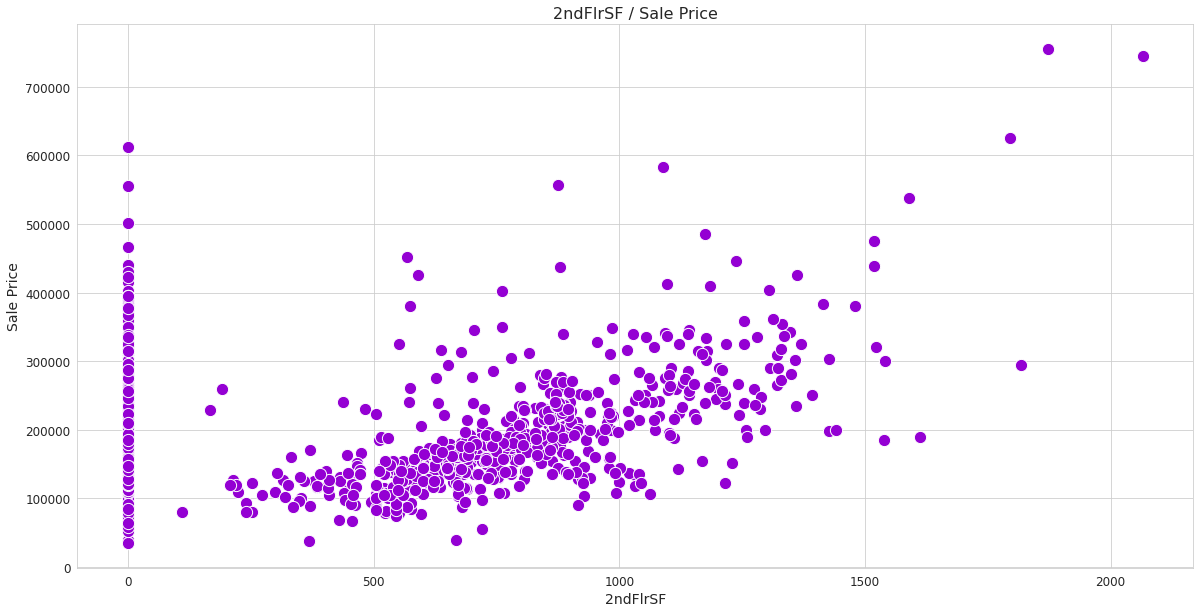

In [17]:
plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
plt.title('{} / Sale Price'.format(i[5]), fontsize = 16)
plt.xlabel('{}'.format(i[5]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter6.png')
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


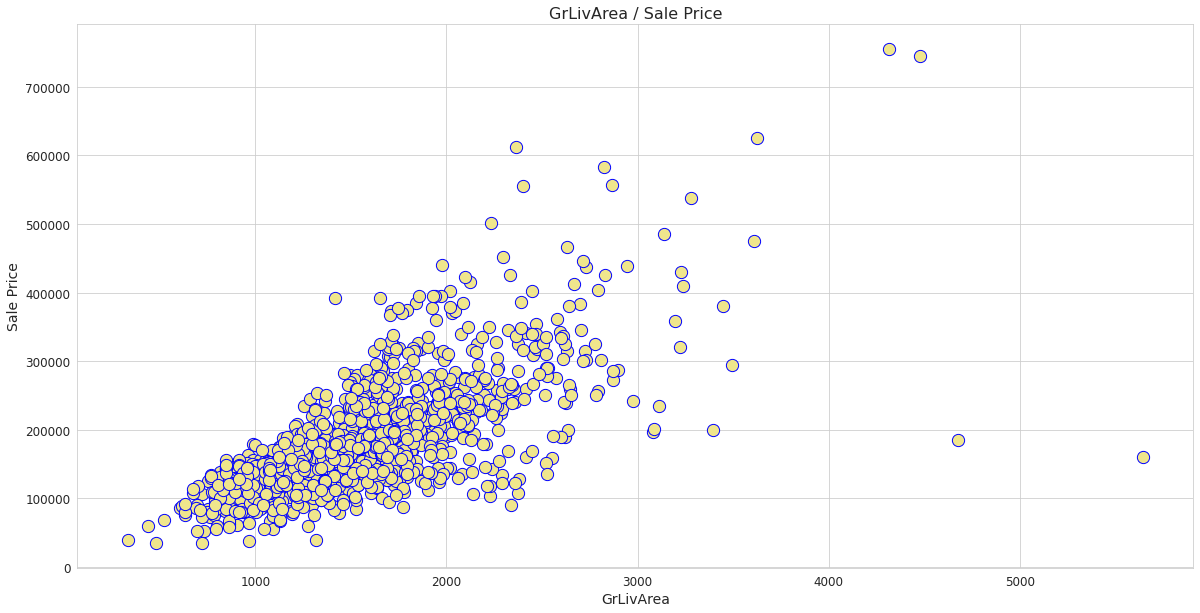

In [18]:
plot7 = sb.scatterplot(i[6], y_var, data = df, color = 'khaki', edgecolor = 'b', s = 150)
plt.title('{} / Sale Price'.format(i[6]), fontsize = 16)
plt.xlabel('{}'.format(i[6]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter7.png')
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


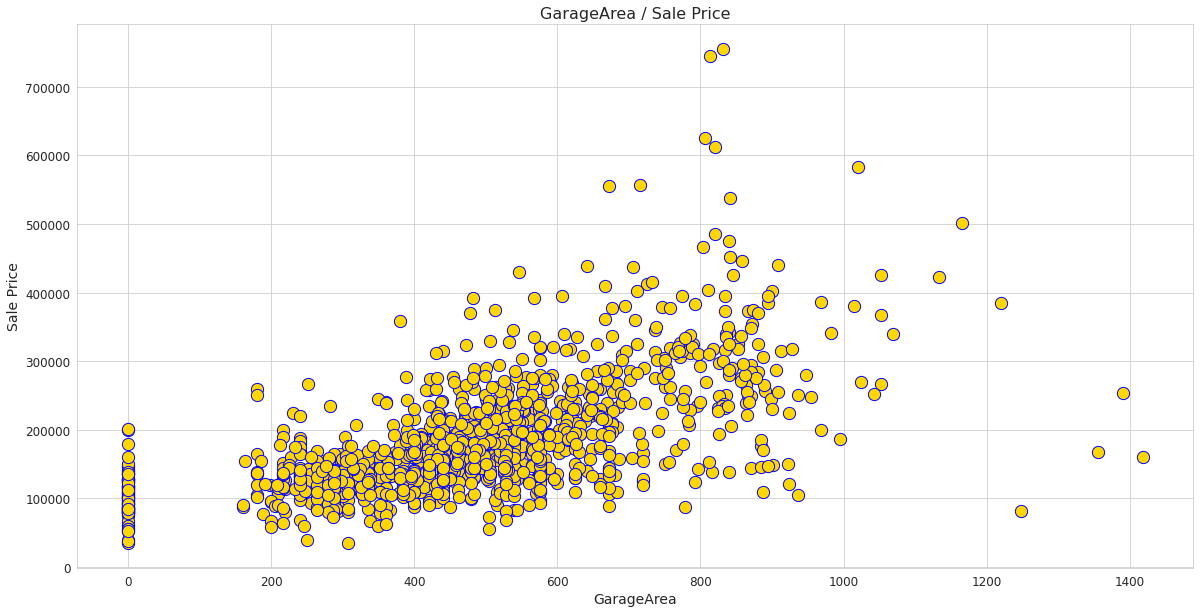

In [19]:
plot8 = sb.scatterplot(i[7], y_var, data = df, color = 'gold', edgecolor = 'b', s = 150)
plt.title('{} / Sale Price'.format(i[7]), fontsize = 16)
plt.xlabel('{}'.format(i[7]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter8.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


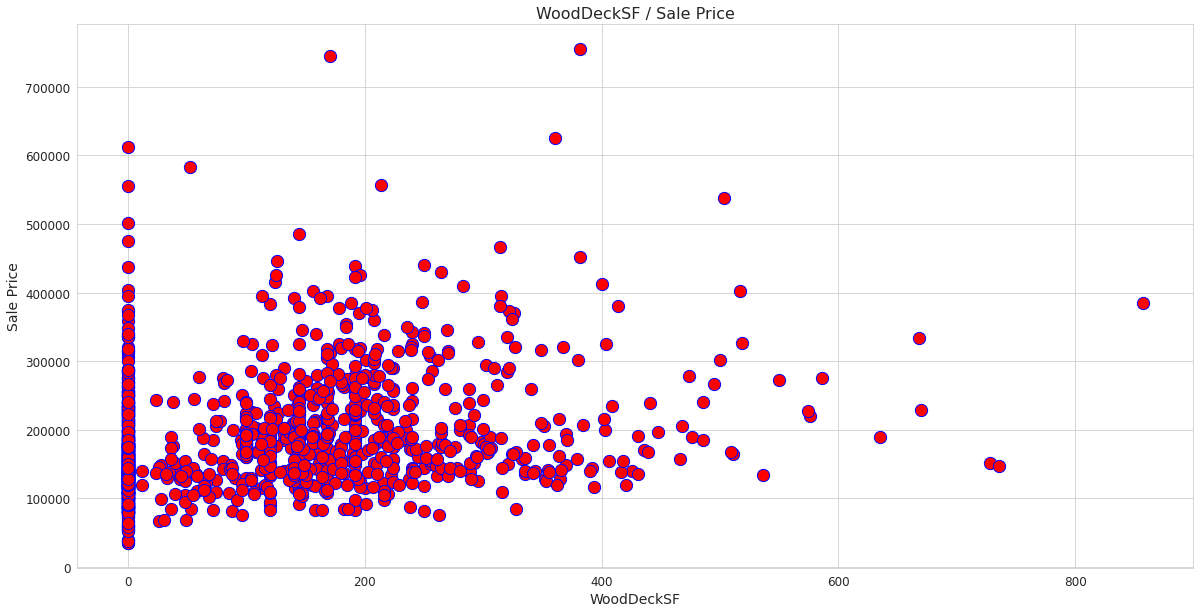

In [20]:
plot9 = sb.scatterplot(i[8], y_var, data = df, color = 'r', edgecolor = 'b', s = 150)
plt.title('{} / Sale Price'.format(i[8]), fontsize = 16)
plt.xlabel('{}'.format(i[8]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter9.png')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


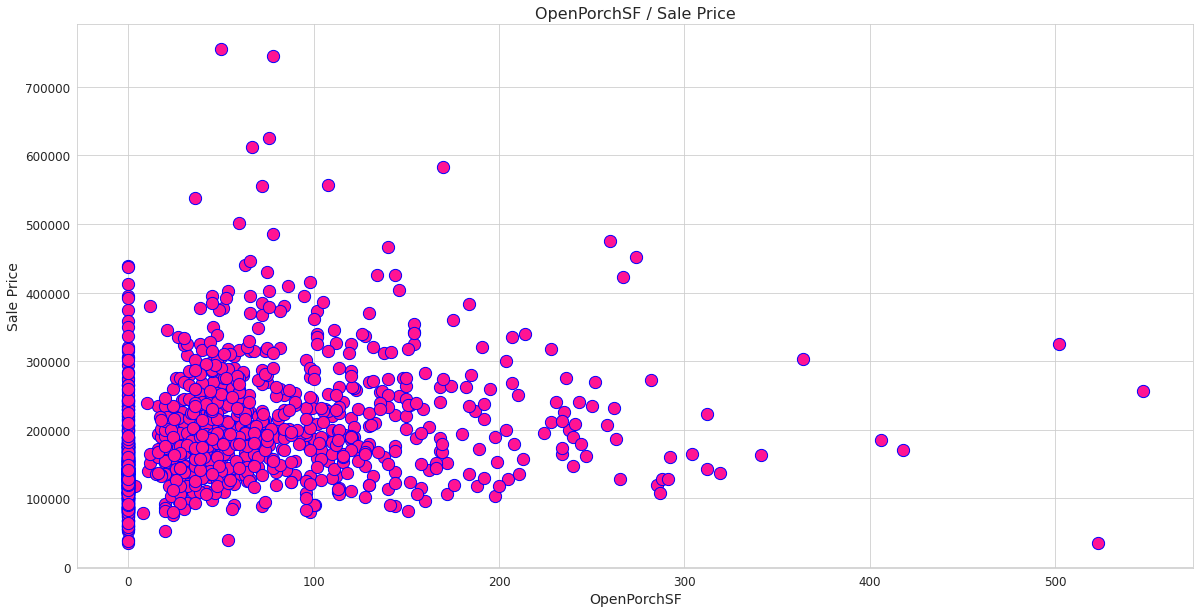

In [21]:
plot10 = sb.scatterplot(i[9], y_var, data = df, color = 'deeppink', edgecolor = 'b', s = 150)
plt.title('{} / Sale Price'.format(i[9]), fontsize = 16)
plt.xlabel('{}'.format(i[9]), fontsize = 14)
plt.ylabel('Sale Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('scatter10.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


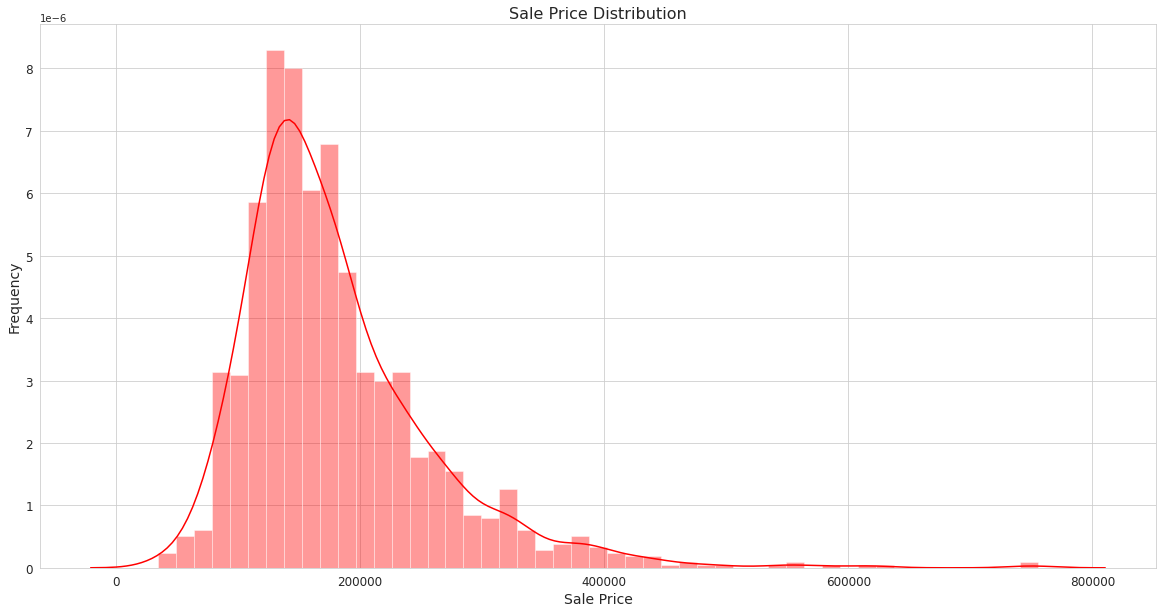

In [22]:
# 3. Distribution plot

sb.distplot(df['SalePrice'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [23]:
# FEATURE SELECTION & DATA SPLIT

X_var = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values
y_var = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[ 10200    219    678   1461   1509      0   1509    600    224      0]
 [  9947      0    577   1188   1217      0   1217    497    168     27]
 [  7200      0      0      0   1040      0   1040    625      0      0]
 [215245      0     80   2136   2036      0   2036    513      0      0]
 [  6120      0    952    952   1022    752   1774    468     90      0]]
X_test samples :  [[ 1953   408   174   483   483   504   987   264    72     0]
 [ 4500   116   319  1216  1216     0  1216   402     0   125]
 [10762   344   284   978  1005   978  1983   490     0     0]
 [39104     0    96  1385  1363     0  1363   439    81     0]
 [10005   299   768  1160  1156   866  2022   505   288   117]]
y_train samples :  [175000 173000 109500 375000 129900]
y_test samples :  [ 83000 164000 225000 241500 192000]


In [24]:
# 1. OLS (Ordinal Least Square)

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


In [25]:
# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

In [26]:
# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1208712720884.2627, tolerance: 723928546.2638093
  positive)


In [27]:
# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

In [28]:
# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1210399075292.0696, tolerance: 723928546.2638093
  positive)


In [29]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.7733369645921897
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.7733369645949042
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.7733370336570462
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.7729434024754465
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.773337033825872
-------------------------------------------------------------------------------


In [30]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.7723836362490331
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.7723836361689898
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.7723836936973347
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.7718873625592486
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.7723836929218632
-------------------------------------------------------------------------------


In [31]:
print(cl('END OF THE PROJECT', attrs = ['bold']))

END OF THE PROJECT
